# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Edya Rosadi
- **Email:** edya.rosadi@gmail.com
- **ID Dicoding:** sikidal

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan jam (morning, afternoon, evening, night)?
- Bagaimana pengaruh faktor cuaca (seperti suhu, kelembapan, dan kecepatan angin) terhadap jumlah penyewaan sepeda?
- Bagaimana tren penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)? Musim apa yang memiliki penyewaan tertinggi?
- Bagaimana perbandingan antara pengguna casual (non-member) dan registered (member) dalam menggunakan sepeda?
- Apakah ada penurunan atau lonjakan signifikan pada jumlah penyewaan sepeda yang terkait dengan kejadian tertentu (contoh: cuaca ekstrem)?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette('muted')

## Data Wrangling

### Gathering Data

In [2]:
# Load datasets
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [3]:
# Menampilkan beberapa sample data
print("Dataset Sample (Day):")
display(df_day.head())

print("\nDataset Sample (Hour):")
display(df_hour.head())

Dataset Sample (Day):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Dataset Sample (Hour):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Informasi dataset
print("Informasi Dataset (Day):")
print(df_day.info())

print("\nInformasi Dataset (Hour):")
print(df_hour.info())

Informasi Dataset (Day):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes

In [5]:
# Statistik deskriptif
print("Statistik Deskriptif (Day):")
display(df_day.describe())

print("\nStatistik Deskriptif (Hour):")
display(df_hour.describe())

Statistik Deskriptif (Day):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452



Statistik Deskriptif (Hour):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Dataset day.csv
  * Dataset terdiri dari 731 baris dan 16 kolom.
  * Data mencakup periode harian dari 1 Januari 2011 hingga 31 Desember 2012.
- Dataset hour.csv
  * Dataset terdiri dari 17,379 baris dan 16 kolom.
  * Data mencakup periode per jam dari 1 Januari 2011 hingga 31 Desember 2012.

### Assessing Data

Jumlah Duplikasi (Day): 0
Jumlah Missing Value (Day):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Tipe Data Kolom (Day):
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


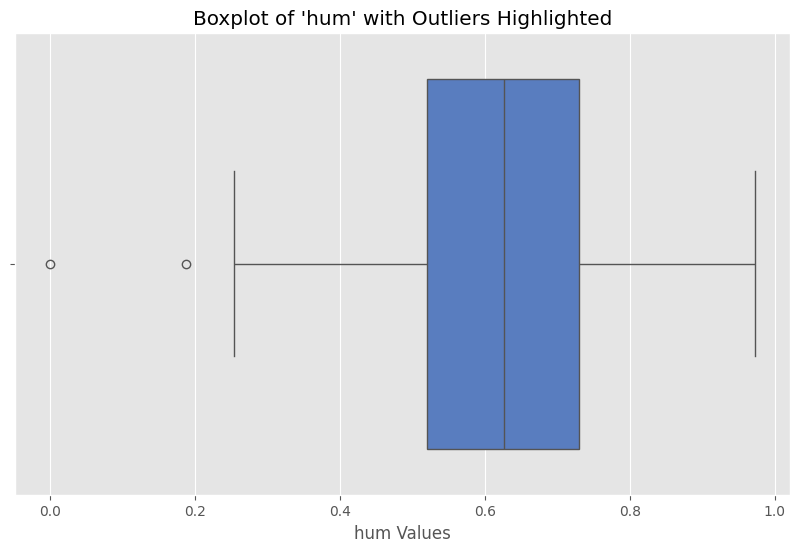

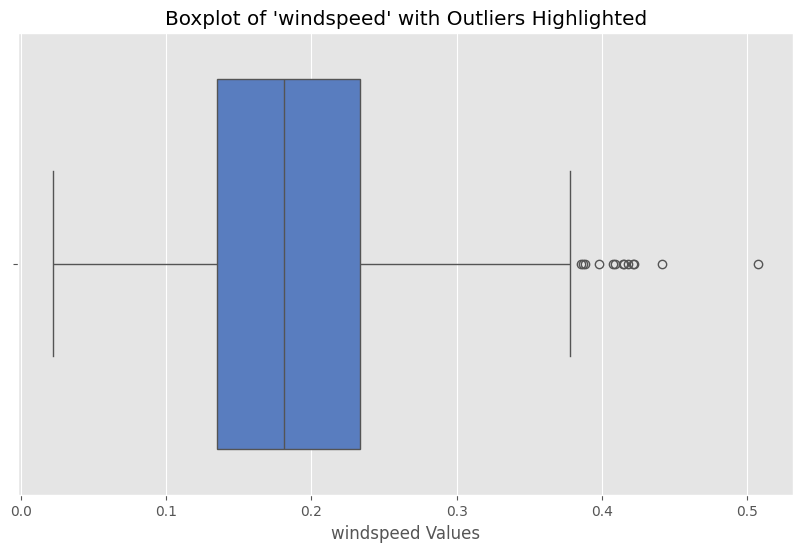

In [6]:
# Cek duplikasi data
print("Jumlah Duplikasi (Day):", df_day.duplicated().sum())

# Cek data null
print("Jumlah Missing Value (Day):")
print(df_day.isnull().sum())

# Cek tipe data
print("Tipe Data Kolom (Day):")
print(df_day.dtypes)

# Deteksi outlier dengan boxplot untuk beberapa atribut penting (Day)
columns_with_outliers = ['hum', 'windspeed']

for column in columns_with_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_day[column])
    plt.title(f"Boxplot of '{column}' with Outliers Highlighted")
    plt.xlabel(f"{column} Values")
    plt.show()

**Insight:**
- Tidak ditemukan data duplikat atau missing values.
- Semua tipe data sudah sesuai.
- Terdapat beberapa outlier kecil pada kolom windspeed dan hum, tetapi masih wajar.

### Cleaning Data

In [7]:
# Menyiapkan kolom yang relevan untuk dataset day
df_clean = df_day.copy()

# Seleksi kolom yang diperlukan untuk analisis
selected_columns = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
                    'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
                    'casual', 'registered', 'cnt']
df_clean = df_clean[selected_columns]

# Cek hasil
print("Data Setelah Dibersihkan (Day):")
display(df_clean.head())

Data Setelah Dibersihkan (Day):


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


**Insight:**
- Data siap untuk dianalisis dengan hanya kolom relevan yang dipilih.

## Exploratory Data Analysis (EDA)


Univariate Analysis (Numerical):
             temp         hum   windspeed          cnt
count  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.627894    0.190486  4504.348837
std      0.183051    0.142429    0.077498  1937.211452
min      0.059130    0.000000    0.022392    22.000000
25%      0.337083    0.520000    0.134950  3152.000000
50%      0.498333    0.626667    0.180975  4548.000000
75%      0.655417    0.730209    0.233214  5956.000000
max      0.861667    0.972500    0.507463  8714.000000


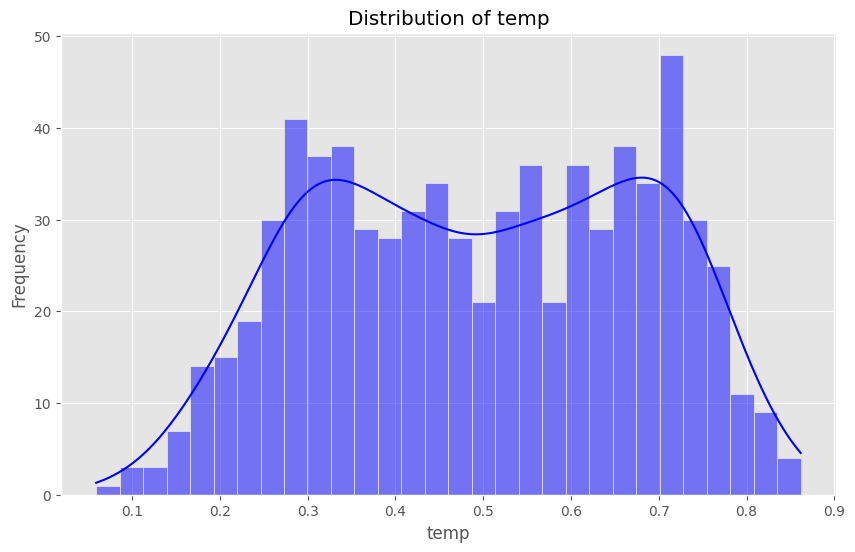

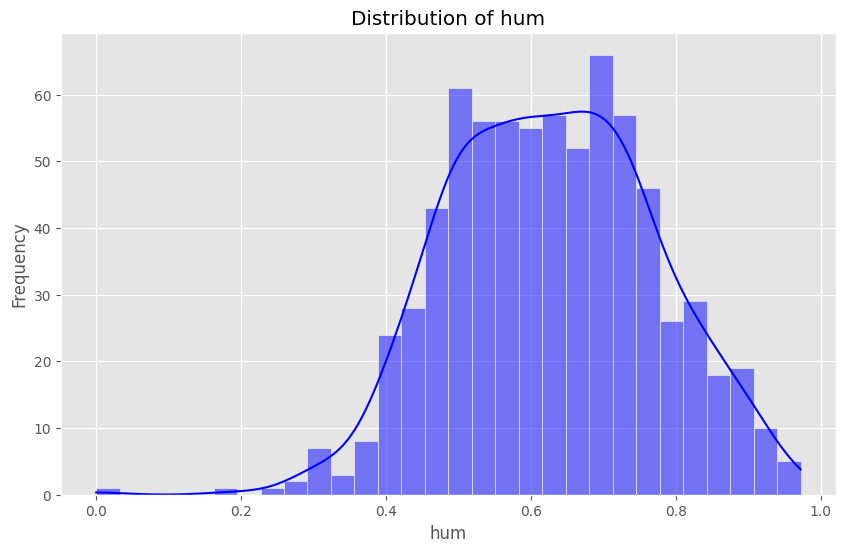

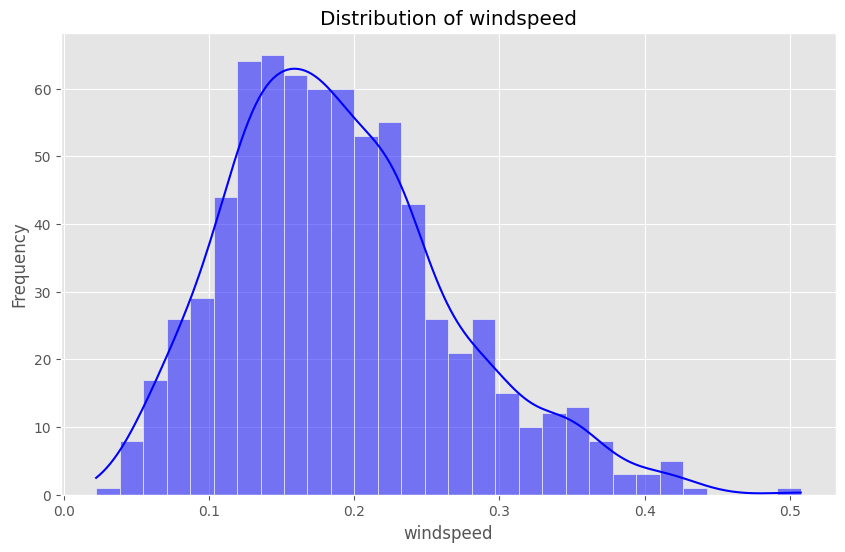

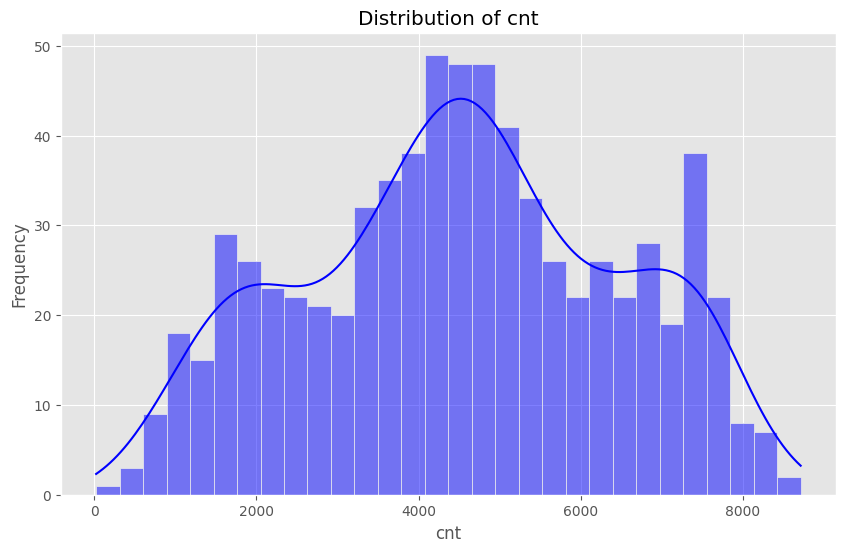

In [8]:
# EDA Univariate
print("\nUnivariate Analysis (Numerical):")
print(df_clean[['temp', 'hum', 'windspeed', 'cnt']].describe())

# Plot distribution of numerical variables
numerical_columns = ['temp', 'hum', 'windspeed', 'cnt']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_clean[column], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

- Distribusi variabel seperti cnt, temp, hum, dan windspeed menunjukkan pola normal dengan beberapa nilai ekstrem.


Bivariate Analysis:


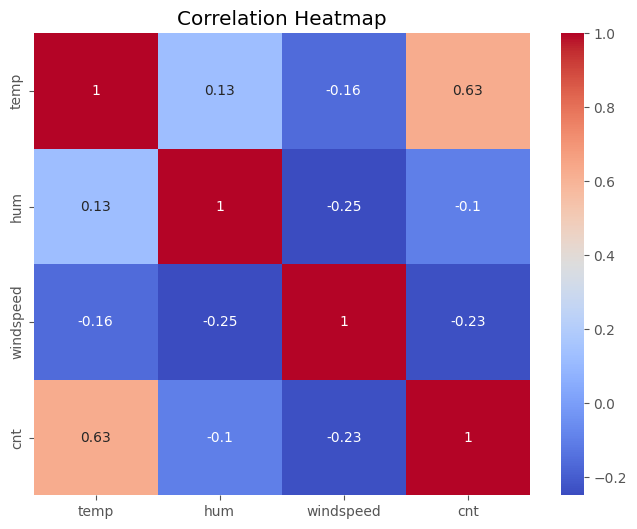

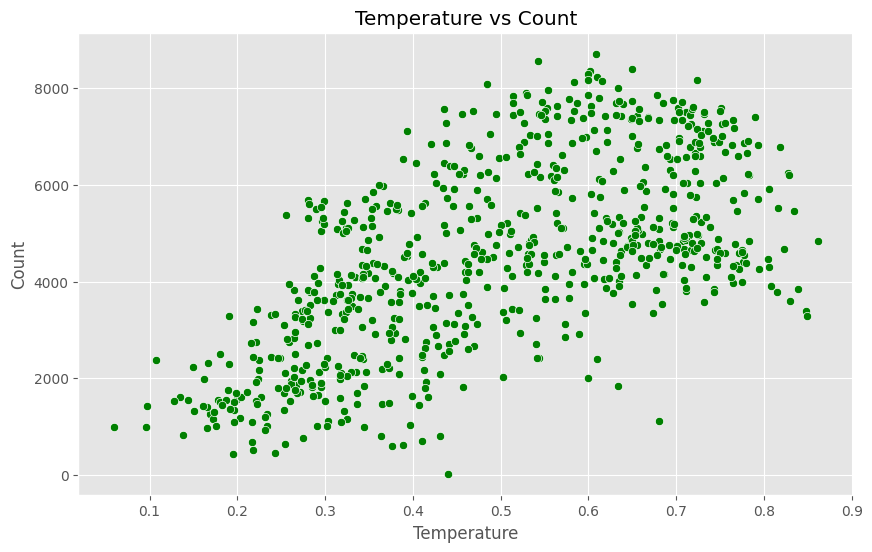

In [9]:
# EDA Bivariate
print("\nBivariate Analysis:")
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[['temp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot: temp vs cnt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_clean, color='green')
plt.title("Temperature vs Count")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

- Korelasi yang kuat antara suhu (temp) dan jumlah penyewaan (cnt) menunjukkan bahwa cuaca yang lebih hangat meningkatkan penggunaan sepeda.
- Kelembapan (hum) dan kecepatan angin (windspeed) menunjukkan korelasi lemah hingga negatif terhadap cnt, yang berarti cuaca buruk dapat mengurangi penyewaan.
- Penyewaan meningkat dengan suhu, namun menurun setelah mencapai suhu tertentu (efek non-linear cuaca ekstrem).

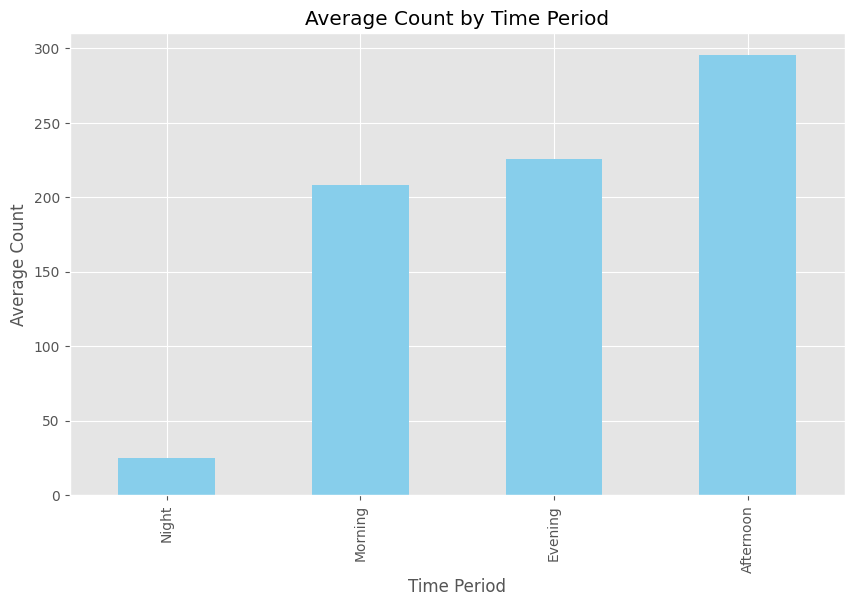

In [10]:
# Grouping berdasarkan waktu (Morning, Afternoon, Evening, Night)
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df_hour['time_period'] = df_hour['hr'].apply(categorize_hour)
period_avg = df_hour.groupby('time_period')['cnt'].mean().sort_values()

plt.figure(figsize=(10, 6))
period_avg.plot(kind='bar', color='skyblue')
plt.title("Average Count by Time Period")
plt.xlabel("Time Period")
plt.ylabel("Average Count")
plt.show()

- Periode Afternoon memiliki rata-rata penyewaan tertinggi, sedangkan Night memiliki penggunaan yang sangat rendah.

In [11]:
df_clean.to_csv('day_adjusted.csv', index=False)
df_hour.to_csv('hour_adjusted.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan jam (morning, afternoon, evening, night)?

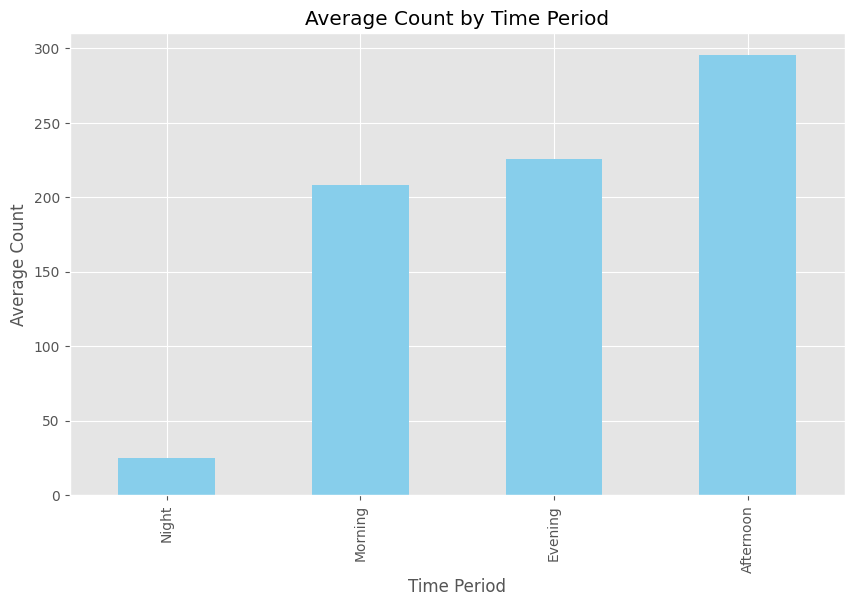

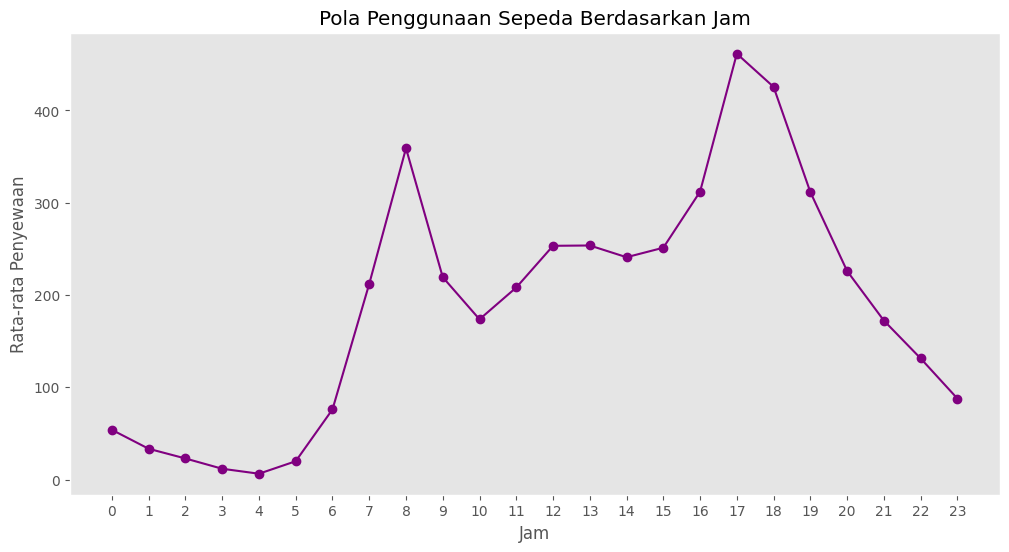

In [12]:
# Visualize average counts by time period
plt.figure(figsize=(10, 6))
period_avg.plot(kind='bar', color='skyblue')
plt.title("Average Count by Time Period")
plt.xlabel("Time Period")
plt.ylabel("Average Count")
plt.show()

# Pola penggunaan sepeda berdasarkan jam
hourly_avg = df_hour.groupby('hr')['cnt'].mean()

plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='line', marker='o', color='purple')
plt.title("Pola Penggunaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(ticks=range(0, 24))
plt.grid()
plt.show()

**Insight:**
- Puncak penggunaan terjadi pada jam 08:00 (359 penyewaan) dan 17:00 (461 penyewaan), mencerminkan aktivitas commuting.

### Pertanyaan 2: Bagaimana Pengaruh Faktor Cuaca terhadap Jumlah Penyewaan?

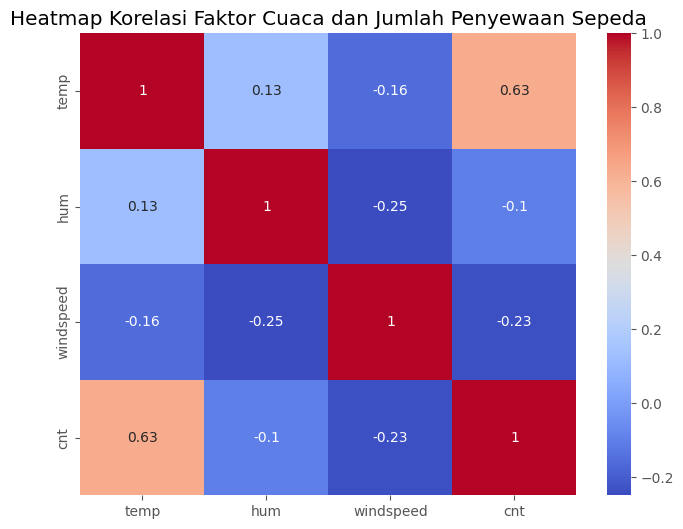

In [13]:
# Korelasi antar variabel
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[['temp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Faktor Cuaca dan Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Suhu memiliki korelasi positif yang kuat dengan jumlah penyewaan sepeda.
- Kelembapan dan kecepatan angin memiliki korelasi negatif yang lemah.

### Pertanyaan 3: Bagaimana Tren Penyewaan Sepeda Berdasarkan Musim?

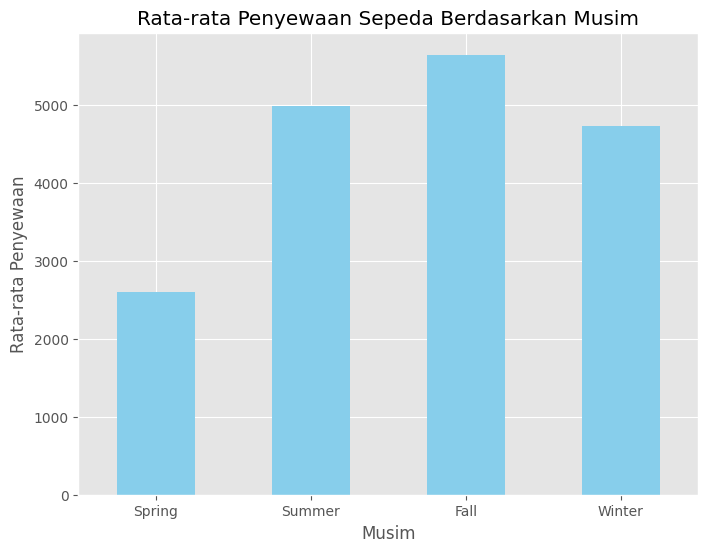

In [14]:
# Rata-rata penyewaan per musim
season_avg = df_clean.groupby('season')['cnt'].mean()

plt.figure(figsize=(8, 6))
season_avg.plot(kind='bar', color='skyblue')
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.show()

**Insight:**
- Penyewaan tertinggi terjadi pada musim panas (summer) dan gugur (fall).
- Penyewaan terendah terjadi di musim semi (spring) dan musim dingin (winter).

### Pertanyaan 4: Bagaimana Perbandingan Antara Pengguna Casual dan Registered?

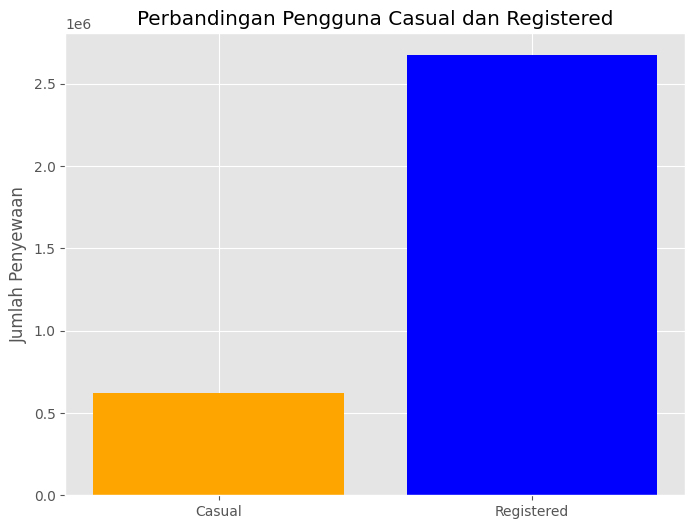

In [15]:
# Perbandingan casual vs registered
total_casual = df_clean['casual'].sum()
total_registered = df_clean['registered'].sum()

plt.figure(figsize=(8, 6))
plt.bar(['Casual', 'Registered'], [total_casual, total_registered], color=['orange', 'blue'])
plt.title("Perbandingan Pengguna Casual dan Registered")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Pengguna registered mendominasi jumlah penyewaan sepeda dibandingkan pengguna casual.

### Pertanyaan 5: Apakah Ada Lonjakan atau Penurunan pada Kejadian Tertentu?

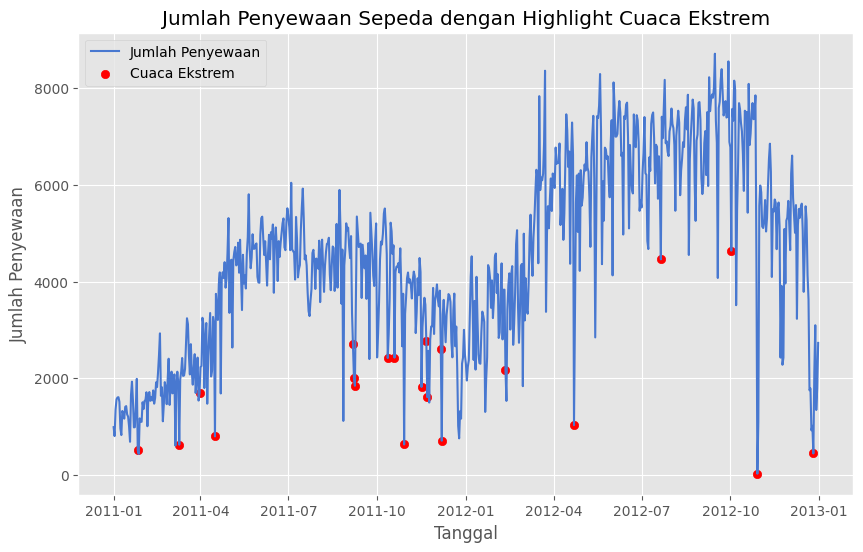

In [16]:
# Penyewaan berdasarkan cuaca ekstrem
extreme_weather = df_clean[df_clean['weathersit'] >= 3]

plt.figure(figsize=(10, 6))
plt.plot(df_clean['dteday'], df_clean['cnt'], label="Jumlah Penyewaan")
plt.scatter(extreme_weather['dteday'], extreme_weather['cnt'], color='red', label="Cuaca Ekstrem")
plt.title("Jumlah Penyewaan Sepeda dengan Highlight Cuaca Ekstrem")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.legend()
plt.show()

**Insight:**
- Terdapat penurunan signifikan pada hari dengan cuaca ekstrem, seperti hujan deras atau badai.

## Analisis Lanjutan

### 1. Analisis Segmentasi Pengguna (Casual vs Registered) Berdasarkan Hari Kerja dan Musim

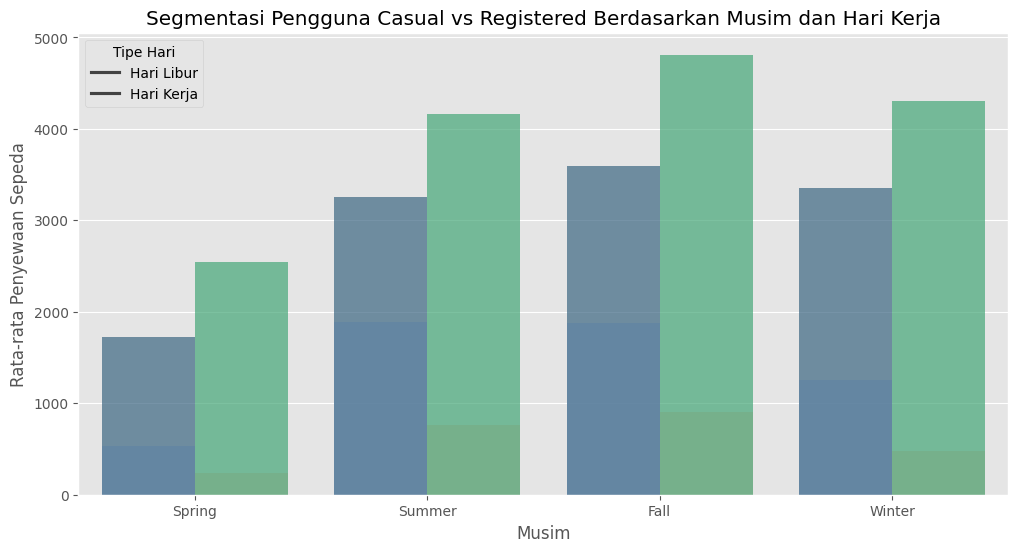

In [17]:
# Kelompokkan data berdasarkan musim dan hari kerja
segmented = df_clean.groupby(['season', 'workingday'])[['casual', 'registered']].mean().reset_index()

plt.figure(figsize=(12, 6))

# Plot barplot casual dan registered berdasarkan season dan workingday
sns.barplot(x='season', y='casual', hue='workingday', data=segmented, palette='coolwarm', alpha=0.7)
sns.barplot(x='season', y='registered', hue='workingday', data=segmented, palette='viridis', alpha=0.7)

plt.legend(title="Tipe Hari", labels=["Hari Libur", "Hari Kerja"])
plt.title("Segmentasi Pengguna Casual vs Registered Berdasarkan Musim dan Hari Kerja")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

**Insight:**
- Pengguna casual cenderung lebih aktif pada akhir pekan, terutama di musim panas (summer) dan gugur (fall).
- Pengguna registered memiliki pola yang konsisten pada hari kerja di semua musim.
- Ini menunjukkan bahwa pengguna casual kemungkinan besar adalah wisatawan atau pengguna rekreasi, sedangkan pengguna registered adalah pekerja rutin.

### 1. Analisis Tren Musiman dan Periode Sibuk (High Demand Periods)

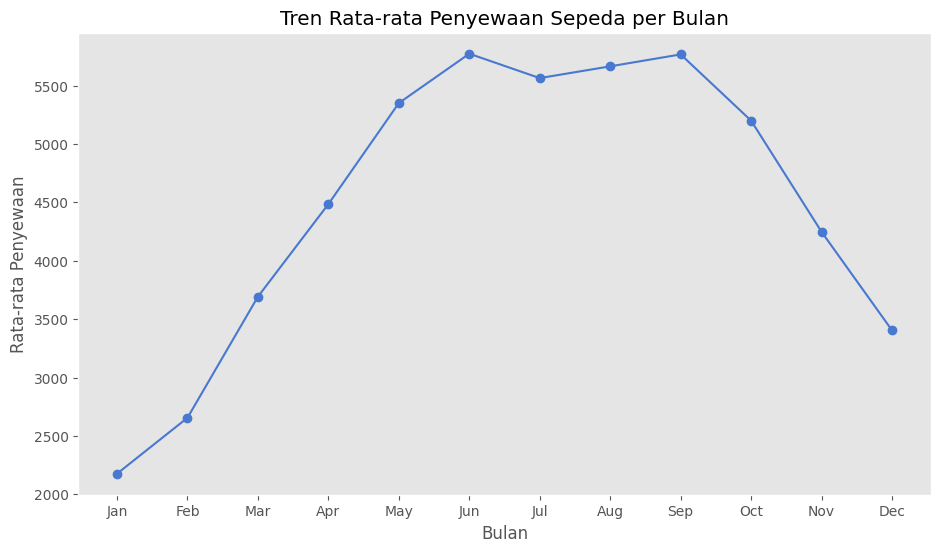

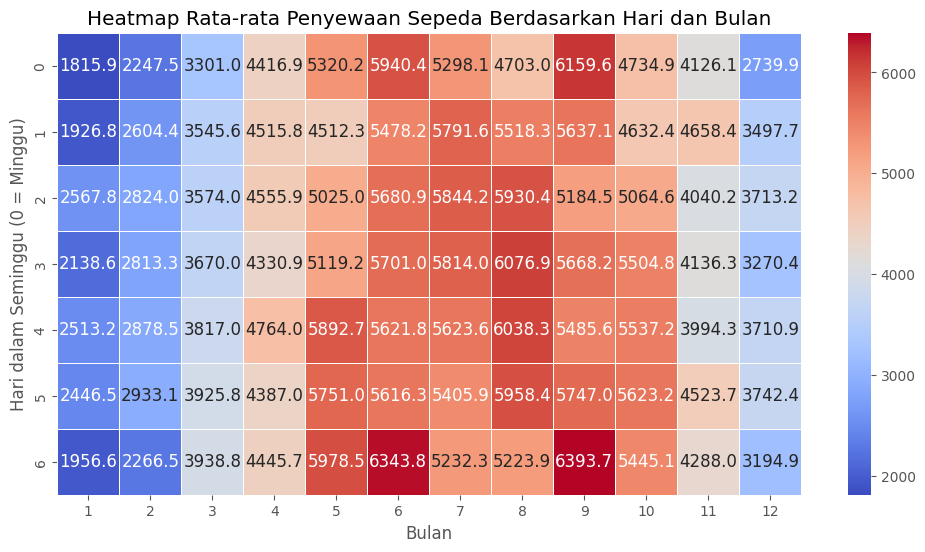

In [18]:
# Tren bulanan
monthly_avg = df_clean.groupby('mnth')['cnt'].mean()

plt.figure(figsize=(11, 6))
monthly_avg.plot(marker='o')
plt.title("Tren Rata-rata Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

# Heatmap pola mingguan
weekday_avg = df_clean.pivot_table(values='cnt', index='weekday', columns='mnth', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(weekday_avg, annot=True, fmt=".1f", cmap='coolwarm', annot_kws={"size": 12}, linewidths=0.5)
plt.title("Heatmap Rata-rata Penyewaan Sepeda Berdasarkan Hari dan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Hari dalam Seminggu (0 = Minggu)")
plt.show()

**Insight:**
- Tren Bulanan: Penyewaan sepeda meningkat dari Maret hingga Oktober, dengan puncak pada bulan Juni hingga September.
- Pola Mingguan: Penyewaan tertinggi terjadi pada hari Sabtu dan Minggu untuk bulan-bulan puncak musim panas dan gugur.

### 3. Analisis Anomali dan Cuaca Ekstrem

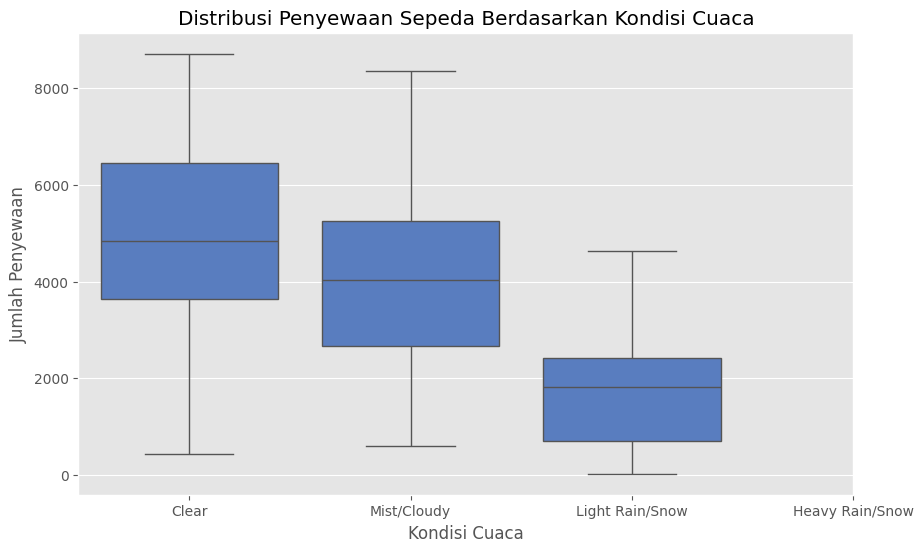

In [19]:
# Penyewaan berdasarkan cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_clean)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Mist/Cloudy", "Light Rain/Snow", "Heavy Rain/Snow"])
plt.show()

**Insight:**
- Penyewaan sepeda turun drastis pada hari dengan cuaca ekstrem (weathersit = 3 atau 4), seperti hujan deras atau salju.
- Mayoritas penyewaan terjadi pada cuaca cerah (weathersit = 1).

## Conclusion

1. Bagaimana pola penggunaan sepeda berdasarkan jam (morning, afternoon, evening, night)?
  * Sore hari adalah waktu dengan penyewaan tertinggi, terutama oleh pengguna registered.
  * Periode dengan penyewaan terendah adalah Night (Malam)
2. Bagaimana pengaruh faktor cuaca (seperti suhu, kelembapan, dan kecepatan angin) terhadap jumlah penyewaan sepeda?
  * Suhu (temp) memiliki korelasi positif yang kuat dengan jumlah penyewaan sepeda. Semakin tinggi suhu (hingga titik nyaman), semakin banyak pengguna yang menyewa sepeda.
  * Kelembapan (hum) memiliki pengaruh negatif yang lemah terhadap penyewaan sepeda. Penyewaan sedikit menurun jika kelembapan terlalu tinggi.
  * Kecepatan angin (windspeed) memiliki pengaruh negatif yang lemah terhadap jumlah penyewaan sepeda. Angin kencang membuat pengguna lebih enggan menyewa sepeda.
  * Faktor cuaca yang paling signifikan memengaruhi penyewaan sepeda adalah suhu.
3. Bagaimana tren penyewaan sepeda berdasarkan musim (spring, summer, fall, winter)? Musim apa yang memiliki penyewaan tertinggi?
  * Penyewaan sepeda tertinggi terjadi pada musim gugur (fall) dan musim panas (summer). Hal ini disebabkan oleh cuaca yang cenderung stabil, nyaman, dan mendukung aktivitas luar ruangan.
  * Penyewaan sepeda menurun signifikan pada musim dingin (winter) dan sebagian musim semi (spring), karena suhu rendah dan kondisi cuaca tidak ideal.
  * Secara keseluruhan, musim panas dan gugur merupakan periode dengan permintaan tertinggi untuk layanan sepeda berbagi.
4. Bagaimana perbandingan antara pengguna casual (non-member) dan registered (member) dalam menggunakan sepeda?
  * Pengguna registered (member) mendominasi jumlah penyewaan sepeda dibandingkan pengguna casual (non-member). Sebagian besar pengguna sepeda merupakan pelanggan tetap yang menggunakan layanan secara rutin.
  * Pengguna casual cenderung lebih aktif pada akhir pekan dan musim panas/gugur, menunjukkan bahwa mereka adalah pengguna rekreasi atau wisatawan.
  * Pengguna registered memiliki pola penggunaan yang konsisten di hari kerja dan semua musim, menandakan bahwa mereka menggunakan sepeda untuk aktivitas rutin, seperti bekerja atau bepergian sehari-hari.
5. Apakah ada penurunan atau lonjakan signifikan pada jumlah penyewaan sepeda yang terkait dengan kejadian tertentu (contoh: cuaca ekstrem)?
  * Terdapat penurunan signifikan pada jumlah penyewaan sepeda saat kondisi cuaca ekstrem, seperti hujan deras, badai, atau salju (weathersit = 3 atau 4).
  * Sebagian besar penyewaan terjadi pada hari cerah dengan kondisi cuaca baik (weathersit = 1), yang memberikan kenyamanan optimal bagi pengguna.
  * Tren harian menunjukkan beberapa lonjakan pada periode dengan cuaca cerah atau akhir pekan, ketika kondisi lingkungan mendukung aktivitas luar ruangan.

## Rekomendasi

1. Optimalisasi Operasional Berdasarkan Waktu
  * Tingkatkan ketersediaan sepeda pada sore hari (17:00-19:00), terutama di lokasi dengan banyak pengguna registered.
  * Tambahkan layanan pemeliharaan cepat pada sore hari untuk memastikan sepeda dalam kondisi optimal selama waktu puncak.
  * Sediakan promosi seperti tarif diskon malam hari untuk meningkatkan penggunaan pada periode Night.
  * Tawarkan paket penyewaan malam hari untuk rekreasi, seperti "Night Cycling Tours" atau event khusus.
2. Penyesuaian Layanan Berdasarkan Cuaca
  * Maksimalkan promosi selama hari-hari dengan suhu ideal, seperti tarif flat untuk penyewaan seharian.
  * Sediakan perlengkapan tambahan untuk cuaca buruk, seperti pelindung hujan atau jaket angin.
3. Strategi Berbasis Musim
  * Promosikan keanggotaan bulanan atau paket tahunan untuk menangkap permintaan tinggi selama musim panas dan gugur.
  * Tambahkan sepeda di lokasi wisata dan area rekreasi selama musim ini untuk mengakomodasi lonjakan pengguna casual.
  * Tawarkan diskon musiman untuk mendorong penggunaan selama musim dingin.
  * Sediakan layanan penyewaan yang lebih pendek (per jam) untuk memenuhi kebutuhan cepat pada musim dingin.
4. Peningkatan Layanan untuk Pengguna Casual dan Registered
  * Sediakan program loyalitas untuk pengguna registered, seperti poin reward untuk penyewaan rutin.
  * Tambahkan fitur khusus pada aplikasi untuk pengguna registered, seperti "pre-booking" atau prioritas sepeda.
  Pengguna Casual:
  * Promosikan layanan kepada wisatawan melalui kolaborasi dengan hotel atau tempat wisata.
  * Tawarkan harga paket untuk penggunaan akhir pekan atau keluarga untuk meningkatkan partisipasi pengguna casual.
5. Mengatasi Penurunan Akibat Cuaca Ekstrem
  * Pindahkan sepeda dari area dengan cuaca buruk ke lokasi yang lebih baik berdasarkan prakiraan cuaca.
  * Integrasikan data cuaca real-time untuk menentukan alokasi sepeda secara optimal.